# **Inicializar o GEE**



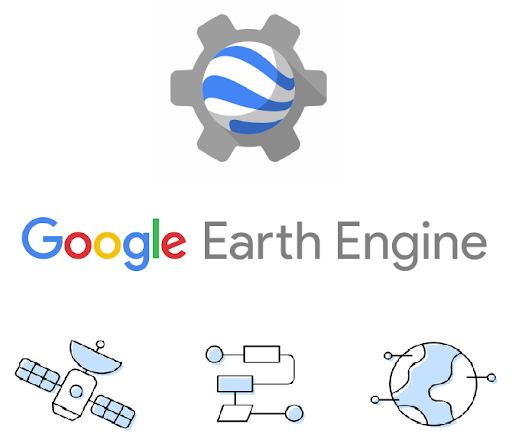

1. Criar conta no Google Earth Engine
  - Criar conta nesse site: https://code.earthengine.google.com/register
 - Passo-a-passo de como abri conta no GEE: https://docs.google.com/document/d/1IvF4M2jtvOA5Jz2Ukzb0wcWlDjYcSHW9/edit?usp=sharing&ouid=107746204627544224004&rtpof=true&sd=true
  - Vídeo explicativo: https://www.youtube.com/watch?v=NHhgaprxWRw

2. Informações:
 - Google Earth Engine (GEE) - https://earthengine.google.com/
 - Datasets do GEE - https://developers.google.com/earth-engine/datasets?hl=pt-br
 - Catálogo da comunidade GEE - https://gee-community-catalog.org/
 - Geemap - https://geemap.org/
 - Ambgeo - https://www.youtube.com/@ambgeo/playlists. Acessar a playlist Python e GEE
 - Google Earth Engine with Amirhossein Ahrari - https://www.youtube.com/@amirhosseinahrarigee

# Inicializando GEE

In [1]:
# importa bibliotecas
import ee, geemap

# inicializando pelo GEE
#ee.Authenticate()
#ee.Initialize(project='ee-enrique')

# ou inicializando pelo GEEMAP: https://github.com/gee-community
geemap.ee_initialize(project='d2021028876')

In [ ]:
# verificando a versão instalada do Earth Engine
print(ee.__version__)

#  Mapa básico no geemap

In [ ]:
# criando um mapa interativo
Map = geemap.Map(center=[-11,-53], zoom=4)

# adicionando basemap
Map.add_basemap('SATELLITE')

# exibe na tela
Map

In [ ]:
geemap.Map?

# Mapa de precipitação do [CHIRPS](https://developers.google.com/earth-engine/datasets/catalog/UCSB-CHG_CHIRPS_DAILY?hl=pt-br) - `GLOBAL`

In [ ]:
# carregando os dados
chirps = ee.ImageCollection('UCSB-CHG/CHIRPS/DAILY') \
           .select('precipitation') \
           .filterDate('2024-01-01', '2025-01-01')
chirps

In [ ]:
# carregando os dados
chirps = ee.ImageCollection('UCSB-CHG/CHIRPS/DAILY') \
           .select('precipitation') \
           .filterDate('2024-01-01', '2025-01-01')

# paleta de cores
vis = {'min': 0,
       'max': 3000,
       'palette': ['000080', '0000d9', '4000ff', '8000ff', '0080ff', '00ffff', '00ff80',
                   '80ff00', 'daff00', 'ffff00', 'fff500', 'ffda00', 'ffb000', 'ffa400',
                   'ff4f00', 'ff2500', 'ff0a00', 'ff00ff']}

# cria a moldura do mapa
Map = geemap.Map()

# plota mapa
Map.addLayer(chirps.sum(),
             vis,
             'Precipitação - 2024')

# barra de cores
colors = vis["palette"]
vmin = vis["min"]
vmax = vis["max"]
Map.add_colorbar_branca(colors=colors, vmin=vmin, vmax=vmax, layer_name='Precipitação [mm/ano]')

# exibe na tela
Map

# Mapa de precipitação do [CHIRPS](https://developers.google.com/earth-engine/datasets/catalog/UCSB-CHG_CHIRPS_DAILY?hl=pt-br) - `BRASIL`

In [ ]:
# filtrar região de interesse
brasil = ee.FeatureCollection('FAO/GAUL/2015/level0').filter(ee.Filter.eq('ADM0_NAME', 'Brazil'))
estado_sp = ee.FeatureCollection('FAO/GAUL/2015/level1').filter(ee.Filter.eq('ADM1_NAME', 'Sao Paulo'))
municipio_sp = ee.FeatureCollection('FAO/GAUL/2015/level2').filter(ee.Filter.eq('ADM2_NAME', 'Sao Paulo'))

# carregando os dados
chirps = ee.ImageCollection('UCSB-CHG/CHIRPS/DAILY') \
           .select('precipitation') \
           .filterDate('2024-01-01', '2025-01-01') \
           .filterBounds(brasil)

# paleta de cores
vis = {'min': 0,
       'max': 3000,
       'palette': ['000080', '0000d9', '4000ff', '8000ff', '0080ff', '00ffff', '00ff80',
                   '80ff00', 'daff00', 'ffff00', 'fff500', 'ffda00', 'ffb000', 'ffa400',
                   'ff4f00', 'ff2500', 'ff0a00', 'ff00ff']}

# cria a moldura do mapa
Map = geemap.Map()

# centraliza o mapa
Map.centerObject(brasil, zoom=4)

# plota mapa
Map.addLayer(chirps.sum().clip(brasil),
             vis,
             'Precipitação - 2024')

# contorno da região
style = {'color': 'black', 'fillColor': '00000000'}
Map.addLayer(brasil.style(**style), {}, 'Brasil')

# barra de cores
colors = vis["palette"]
vmin = vis["min"]
vmax = vis["max"]
Map.add_colorbar_branca(colors=colors, vmin=vmin, vmax=vmax, layer_name='Precipitação [mm/ano]')

# exibe na tela
Map

# Mapa de precipitação do [IMERGE](https://developers.google.com/earth-engine/datasets/catalog/NASA_GPM_L3_IMERG_V07?hl=pt-br): para um dia específico - `GLOBAL`

In [13]:
imerge = ee.ImageCollection('NASA/GPM_L3/IMERG_V07') \
           .filterDate('2025-06-12', '2025-06-13')
#pegar a ultima imagem
imerge = imerge.sort('system:time_start', False).first()
imerge = imerge.select('precipitation')
imerge

In [8]:
# dados de um dia específico
range = ee.Date('2025-06-12').getRange('day')

# carregando os dados
imerge_30min = ee.ImageCollection('NASA/GPM_L3/IMERG_V07') \
                 .filter(ee.Filter.date(range)) \
                 .select('precipitation')

# seleciona o máximo de precipitação
precipitation = imerge_30min.max()

# mascara valores abaixo de 0.5 mm/h
mask = precipitation.gt(0.5)
precipitation = precipitation.updateMask(mask)

# paleta de cores
vis = {'min': 0,
       'max': 15,
       'palette': ['000096','0064ff', '00b4ff', '33db80', '9beb4a',
                   'ffeb00', 'ffb300', 'ff6400', 'eb1e00', 'af0000']}

# cria a moldura do mapa
Map = geemap.Map()

# plota mapa
Map.addLayer(precipitation,
             vis,
             'Precipitação - jan/2025')

# barra de cores
colors = vis["palette"]
vmin = vis["min"]
vmax = vis["max"]
Map.add_colorbar_branca(colors=colors, vmin=vmin, vmax=vmax, layer_name='Precipitação [mm/h]')

# exibe na tela
Map

Map(center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(childr…

# Mapa de precipitação do [IMERGE](https://developers.google.com/earth-engine/datasets/catalog/NASA_GPM_L3_IMERG_V07?hl=pt-br): para um mês. Calcula o acumulado de preciptação para o mês de Janeiro de 2025 - `BRASIL`

In [4]:
# filtrar região de interesse
brasil = ee.FeatureCollection('FAO/GAUL/2015/level0').filter(ee.Filter.eq('ADM0_NAME', 'Brazil'))
estado_sp = ee.FeatureCollection('FAO/GAUL/2015/level1').filter(ee.Filter.eq('ADM1_NAME', 'Sao Paulo'))
municipio_sp = ee.FeatureCollection('FAO/GAUL/2015/level2').filter(ee.Filter.eq('ADM2_NAME', 'Sao Paulo'))

# carregando os dados
imerge_30min = ee.ImageCollection('NASA/GPM_L3/IMERG_V07') \
                 .filterDate('2025-03-01', '2025-04-01') \
                 .select('precipitation') \
                 .filterBounds(brasil)

# transforma de mm/h para mm/0.5h
imerge_mes = imerge_30min.map(lambda img: img.multiply(0.5).copyProperties(img, img.propertyNames()))

# soma a chuva do mês, ficando a unidade em mm/mês
imerge_mes = imerge_mes.select('precipitation').sum()

# paleta de cores
vis = {'min': 50,
       'max': 400,
       'palette': ['000080', '0000d9', '4000ff', '8000ff', '0080ff', '00ffff', '00ff80',
                   '80ff00', 'daff00', 'ffff00', 'fff500', 'ffda00', 'ffb000', 'ffa400',
                   'ff4f00', 'ff2500', 'ff0a00', 'ff00ff']}

# cria a moldura do mapa
Map = geemap.Map()

# centraliza o mapa
Map.centerObject(brasil, zoom=4)

# plota mapa
Map.addLayer(imerge_mes.clip(brasil),
             vis,
             'Precipitação - maio/2022')

# contorno da região
style = {'color': 'black', 'fillColor': '00000000'}
Map.addLayer(brasil.style(**style), {}, 'Brasil')

# barra de cores
colors = vis["palette"]
vmin = vis["min"]
vmax = vis["max"]
Map.add_colorbar_branca(colors=colors, vmin=vmin, vmax=vmax, layer_name='Precipitação [mm/mês]')

# exibe na tela
Map

Map(center=[-10.613275552794567, -53.19823757236853], controls=(WidgetControl(options=['position', 'transparen…